# Pandas Data Structure
1. Series 欄位(一維度)
2. DataFrame 表格（二維度）
3. Panel 三維表格(除了特殊需求之外少使用… 略過)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Series
* a one-dimentional labeled array holding any data types
* data can be
    1. a Python dict
    2. an ndarray
    3. a scalar value

### Create a Series by loading a CSV file

In [2]:
x = pd.Series.from_csv('series_csv_load.csv',sep=',',parse_dates=False,header=0,index_col=0,encoding=None,infer_datetime_format=False)
print("[x.name] : ",x.name)
print("[x.index] : ",x.index)
print("[x.values] : ",x.values)
print("[x.index.name] : ",x.index.name)

[x.name] :  tag value
[x.index] :  Index(['b', 'a', 'c', 'd'], dtype='object')
[x.values] :  [ 1  0  2 -1]
[x.index.name] :  None


### Create a Series from an array
* 可以用pd.Series.from_array
* 也可以直接用pd.Series

In [3]:
x = pd.Series.from_array(np.random.randn(3),name='HAHA')
print("[x] : \n"+str(x))
print("[x.name] : ",x.name)
print("[x.index] : ",x.index)
print("[x.values] : ",x.values)
print("[x.index.name] : ",x.index.name)
print("\n")

x2 = pd.Series(np.random.randn(4),name='HAHA2')
print("[x2] : \n"+str(x2))
print("[x2.name] : ",x2.name)
print("[x2.index] : ",x2.index)
print("[x2.values] : ",x2.values)
print("[x2.index.name] : ",x2.index.name)

[x] : 
0   -0.562424
1    2.884208
2    0.622474
Name: HAHA, dtype: float64
[x.name] :  HAHA
[x.index] :  RangeIndex(start=0, stop=3, step=1)
[x.values] :  [-0.56242376  2.88420825  0.62247403]
[x.index.name] :  None


[x2] : 
0    0.978773
1    0.061640
2    0.325072
3   -0.066925
Name: HAHA2, dtype: float64
[x2.name] :  HAHA2
[x2.index] :  RangeIndex(start=0, stop=4, step=1)
[x2.values] :  [ 0.9787729   0.06163951  0.32507217 -0.06692539]
[x2.index.name] :  None


### Create a Series from a Python dict

In [4]:
x = pd.Series({'b':1,'a':0,'c':2,'d':-1},name="Happy")
print(x)
print("x.name = ",x.name)
print("x.ndim = ",x.ndim)
print("x.index = ",x.index)
print("x.index.name = ",x.index.name)

a    0
b    1
c    2
d   -1
Name: Happy, dtype: int64
x.name =  Happy
x.ndim =  1
x.index =  Index(['a', 'b', 'c', 'd'], dtype='object')
x.index.name =  None


### Grouping Data
* Series.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs)

In [5]:
import random
del x
key = []
for i in range(10):
    key += random.sample(['a','b','c'],1)
x = pd.Series(np.random.randn(10),index = key)
x.index.name = 'index'
print("x.name = ",x.name)
print("x.ndim = ",x.ndim)
print("x.index = ",x.index)
print("x.values = ",x.values)
print("x.index.name = ",x.index.name)
print(str(x.groupby('index').describe())+"\n")
print(str(x.groupby('index').mean())+"\n")



x.name =  None
x.ndim =  1
x.index =  Index(['a', 'c', 'c', 'b', 'a', 'a', 'a', 'b', 'b', 'a'], dtype='object', name='index')
x.values =  [-0.80741325  0.15087345  0.71245504  0.54908425  1.68680578  0.67600744
  0.61152752  1.93716934 -0.74247396 -0.40476827]
x.index.name =  index
       count      mean       std       min       25%       50%       75%  \
index                                                                      
a        5.0  0.352432  0.983740 -0.807413 -0.404768  0.611528  0.676007   
b        3.0  0.581260  1.340111 -0.742474 -0.096695  0.549084  1.243127   
c        2.0  0.431664  0.397098  0.150873  0.291269  0.431664  0.572060   

            max  
index            
a      1.686806  
b      1.937169  
c      0.712455  

index
a    0.352432
b    0.581260
c    0.431664
dtype: float64



### Partly select data
* iloc : 在index的位置上進行索引,不包括end. 
* loc : 在index的標籤上進行索引,範圍包括start和end. 
* ix : 先在index的標籤上索引，索引不到就在index的位置上索引(如果index非全整數),不包括end (即將移除)
* xs : cross-section，在Series只能選單一個key的值，並且無法選axis=1

In [6]:
data = pd.Series(np.arange(10), index=[49,48,47,46,45, 1, 2, 3, 4, 5])
print("------------------------------------------------")
print("for Series data : \n"+str(data)+"\n")
print("data.iloc[:3] => \n"+str(data.iloc[:3])+"\n")
print("data.loc[:3] => \n"+str(data.loc[:3])+"\n")
print("data.ix[:3] => \n"+str(data.ix[:3])+"\n")

data = pd.Series(np.arange(10), index=['s49','s48','s47','s46','s45', 's1', 's2', 's3', 's4', 's5'])
print("------------------------------------------------")
print("for Series data : \n"+str(data)+"\n")
print("data.iloc[:3] => \n"+str(data.iloc[:3])+"\n")
#print("data.loc[:3] => \n"+str(data.loc[:3])+"\n")
print("data.ix[:3] => \n"+str(data.ix[:3])+"\n")
print("data.ix[:'s3'] => \n"+str(data.ix[:'s3'])+"\n")

x = pd.Series({'b':1,'a':0,'c':2,'d':-1},name="Happy")
print('[x]\n'+str(x)+"\n")
print('[x.xs[\'b\']]\n'+str(x.xs('b')))
print('type(x.xs[\'b\']) is '+str(type(x.xs('b')))+"\n")

------------------------------------------------
for Series data : 
49    0
48    1
47    2
46    3
45    4
1     5
2     6
3     7
4     8
5     9
dtype: int32

data.iloc[:3] => 
49    0
48    1
47    2
dtype: int32

data.loc[:3] => 
49    0
48    1
47    2
46    3
45    4
1     5
2     6
3     7
dtype: int32

data.ix[:3] => 
49    0
48    1
47    2
46    3
45    4
1     5
2     6
3     7
dtype: int32

------------------------------------------------
for Series data : 
s49    0
s48    1
s47    2
s46    3
s45    4
s1     5
s2     6
s3     7
s4     8
s5     9
dtype: int32

data.iloc[:3] => 
s49    0
s48    1
s47    2
dtype: int32

data.ix[:3] => 
s49    0
s48    1
s47    2
dtype: int32

data.ix[:'s3'] => 
s49    0
s48    1
s47    2
s46    3
s45    4
s1     5
s2     6
s3     7
dtype: int32

[x]
a    0
b    1
c    2
d   -1
Name: Happy, dtype: int64

[x.xs['b']]
1
type(x.xs['b']) is <class 'numpy.int64'>



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  del sys.path[0]


### Add/Multiply/Divide two Series
* x.add(y): addition = x.radd
* x.sub(y): subtraction
* x.subtract(y): subtraction
* x.mul(y): multiplication
* x.multiply(y): multiplication
* x.div(y): division = x.rdiv
* x.divide(y): division

In [7]:
x = pd.Series({'b':1,'a':0,'c':2,'d':-1},name="Happy")
# y has the same keys
y = pd.Series({'b':3,'a':1,'c':-2,'d':9},name="Happy2")
print("[x + y with the same keys: [x,y,x+y] = \n"+str(pd.concat([x,y,x.add(y)],axis=1))+"\n")
# y has the different keys
y = pd.Series({'bb':3,'a':1,'c':-2,'d':9},name="Happy2")
print("[x + y with different keys]: [x,y,x+y] = \n"+str(pd.concat([x,y,x.add(y)],axis=1))+"\n")
print("[x + y with different keys and fill_value]: [x,y,x+y] = \n"+str(pd.concat([x,y,x.add(y,fill_value=True)],axis=1))+"\n")
y = pd.Series({'b':3,'a':1,'c':-2,'d':9},name="Happy2")
print("[x - y with the same keys: [x,y,x+y] = \n"+str(pd.concat([x,y,x.sub(y)],axis=1))+"\n")
# y has the different keys
y = pd.Series({'bb':3,'a':1,'c':-2,'d':9},name="Happy2")
print("[x - y with different keys]: [x,y,x+y] = \n"+str(pd.concat([x,y,x.sub(y)],axis=1))+"\n")
print("[x - y with different keys and fill_value]: [x,y,x+y] = \n"+str(pd.concat([x,y,x.subtract(y,fill_value=True)],axis=1))+"\n")
y = pd.Series({'b':3,'a':1,'c':-2,'d':9},name="Happy2")
print("[x * y with the same keys]: [x,y,x*y] = \n"+str(pd.concat([x,y,x.mul(y)],axis=1))+"\n")
# y has the different keys
y = pd.Series({'bb':3,'a':1,'c':-2,'d':9},name="Happy2")
print("[x * y with different keys]: [x,y,x*y] \n"+str(pd.concat([x,y,x.mul(y)],axis=1))+"\n")
print("[x * y with different keys and fill_value]: [x,y,x*y] \n"+str(pd.concat([x,y,x.multiply(y,fill_value=True)],axis=1))+"\n")
x = pd.Series([1, 1, 1, np.nan], index=['a', 'b', 'c', 'd'])
y = pd.Series([1, np.nan, 1, np.nan], index=['a', 'b', 'd', 'e'])
print("[x,y,x.div(y)]\n"+str(pd.concat([x,y,x.div(y)],axis=1))+"\n")
print("[x,y,x.divide(y) with fill_value]\n"+str(pd.concat([x,y,x.divide(y,fill_value=True)],axis=1)))

[x + y with the same keys: [x,y,x+y] = 
   Happy  Happy2  0
a      0       1  1
b      1       3  4
c      2      -2  0
d     -1       9  8

[x + y with different keys]: [x,y,x+y] = 
    Happy  Happy2    0
a     0.0     1.0  1.0
b     1.0     NaN  NaN
bb    NaN     3.0  NaN
c     2.0    -2.0  0.0
d    -1.0     9.0  8.0

[x + y with different keys and fill_value]: [x,y,x+y] = 
    Happy  Happy2    0
a     0.0     1.0  1.0
b     1.0     NaN  2.0
bb    NaN     3.0  4.0
c     2.0    -2.0  0.0
d    -1.0     9.0  8.0

[x - y with the same keys: [x,y,x+y] = 
   Happy  Happy2   0
a      0       1  -1
b      1       3  -2
c      2      -2   4
d     -1       9 -10

[x - y with different keys]: [x,y,x+y] = 
    Happy  Happy2     0
a     0.0     1.0  -1.0
b     1.0     NaN   NaN
bb    NaN     3.0   NaN
c     2.0    -2.0   4.0
d    -1.0     9.0 -10.0

[x - y with different keys and fill_value]: [x,y,x+y] = 
    Happy  Happy2     0
a     0.0     1.0  -1.0
b     1.0     NaN   0.0
bb    NaN     3.0  -

### Divide two Series
* pd.Series.div
* pd.Series.divide
* element wise division


### Append another Series to the existed one

In [8]:
x = pd.Series({'b':1,'a':0,'c':2,'d':-1},name="Happy")
y = pd.Series({'b':3,'a':1,'c':-2,'d':9},name="Happy2")
print("x + y with the same keys: \n"+str(x.append(y))+"\n")
print("x + y with the same keys (ignore_index): \n"+str(x.append(y,ignore_index=True))+"\n")
try:
    print("x + y with the same keys (verify_integrity): \n"+str(x.append(y,verify_integrity=True))+"\n")
except:
    print("x + y with the same keys (verify_integrity): \n"+"failed"+"\n")

# y has the different keys
y = pd.Series({'bb':3,'aa':1,'cc':-2,'dd':9},name="Happy2")
print("x + y with different keys: \n"+str(x.append(y))+"\n")
print("x + y with different keys (ignore_index): \n"+str(x.append(y,ignore_index=True))+"\n")
try:
    print("x + y with different keys (verify_integrity): \n"+str(x.append(y,verify_integrity=True))+"\n")
except:
    print("x + y with different keys (verify_integrity): \n"+"failed"+"\n")


x + y with the same keys: 
a    0
b    1
c    2
d   -1
a    1
b    3
c   -2
d    9
dtype: int64

x + y with the same keys (ignore_index): 
0    0
1    1
2    2
3   -1
4    1
5    3
6   -2
7    9
dtype: int64

x + y with the same keys (verify_integrity): 
failed

x + y with different keys: 
a     0
b     1
c     2
d    -1
aa    1
bb    3
cc   -2
dd    9
dtype: int64

x + y with different keys (ignore_index): 
0    0
1    1
2    2
3   -1
4    1
5    3
6   -2
7    9
dtype: int64

x + y with different keys (verify_integrity): 
a     0
b     1
c     2
d    -1
aa    1
bb    3
cc   -2
dd    9
dtype: int64



### 強制將Series裡的值cast資料型別

In [9]:
x = pd.Series({'b':1,'a':0,'c':2,'d':-1},name="Happy")
print("original data type: \n"+str(x)+"\n")
print('[x.astype(int)]\n'+str(x.astype(int))+"\n")
print('[x.astype(int64)]\n'+str(x.astype(np.int64))+"\n")
print('[x.astype(\'float64\')]\n'+str(x.astype('float64'))+"\n")
print('[x.astype(float)]\n'+str(x.astype(float))+"\n")
print('[x.astype(np.float64)]\n'+str(x.astype(np.float64))+"\n")
print('[x.astype(str)]\n'+str(x.astype(str))+"\n")

original data type: 
a    0
b    1
c    2
d   -1
Name: Happy, dtype: int64

[x.astype(int)]
a    0
b    1
c    2
d   -1
Name: Happy, dtype: int32

[x.astype(int64)]
a    0
b    1
c    2
d   -1
Name: Happy, dtype: int64

[x.astype('float64')]
a    0.0
b    1.0
c    2.0
d   -1.0
Name: Happy, dtype: float64

[x.astype(float)]
a    0.0
b    1.0
c    2.0
d   -1.0
Name: Happy, dtype: float64

[x.astype(np.float64)]
a    0.0
b    1.0
c    2.0
d   -1.0
Name: Happy, dtype: float64

[x.astype(str)]
a     0
b     1
c     2
d    -1
Name: Happy, dtype: object



### 搜尋與取代值
* replace

In [10]:
x = pd.Series([10, 11, 12, 13, 14])
print('[x]\n'+str(x)+"\n")
print('[x.replace(10,\'R\')]\n'+str(x.replace(10,'R'))+"\n")
print('[x.replace([10],\'R\')]\n'+str(x.replace([10],'R'))+"\n")
print('[x.replace([10,11],\'R\')]\n'+str(x.replace([10,11],'R'))+"\n")
print('[x.replace([10,11],[\'R\',\'R2\'])]\n'+str(x.replace([10,11],['R','R2']))+"\n")
print('[x.replace({10:\'R\'})]\n'+str(x.replace({10:'R'}))+"\n")
print('[x.replace({10:\'R\',14:99})]\n'+str(x.replace({10:'R',14:99}))+"\n")

[x]
0    10
1    11
2    12
3    13
4    14
dtype: int64

[x.replace(10,'R')]
0     R
1    11
2    12
3    13
4    14
dtype: object

[x.replace([10],'R')]
0     R
1    11
2    12
3    13
4    14
dtype: object

[x.replace([10,11],'R')]
0     R
1     R
2    12
3    13
4    14
dtype: object

[x.replace([10,11],['R','R2'])]
0     R
1    R2
2    12
3    13
4    14
dtype: object

[x.replace({10:'R'})]
0     R
1    11
2    12
3    13
4    14
dtype: object

[x.replace({10:'R',14:99})]
0     R
1    11
2    12
3    13
4    99
dtype: object



### where 和 mask
* series.where(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False, raise_on_error=None)
    * 搜尋cond為真的欄位並保持原值，其餘用other (default為nan) 取代
* series.mask(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False, raise_on_error=None)
    * 搜尋cond為真的欄位用other (default為nan) 取代，其餘保持原值

In [11]:
x = pd.Series(range(-2,2))
print('x:\n'+str(x)+"\n")
print('x.where(x > 0):\n'+str(x.where(x>0))+"\n")
print('x.where(x > 0, 999):\n'+str(x.where(x>0,999))+"\n")
print('x.mask(x > 0):\n'+str(x.mask(x>0))+"\n")
print('x.mask(x > 0,999):\n'+str(x.mask(x>0,999))+"\n")

x:
0   -2
1   -1
2    0
3    1
dtype: int32

x.where(x > 0):
0    NaN
1    NaN
2    NaN
3    1.0
dtype: float64

x.where(x > 0, 999):
0    999
1    999
2    999
3      1
dtype: int32

x.mask(x > 0):
0   -2.0
1   -1.0
2    0.0
3    NaN
dtype: float64

x.mask(x > 0,999):
0     -2
1     -1
2      0
3    999
dtype: int32



### 使用function來處理Series值
* transform
* apply

In [12]:
print('[x]\n'+str(x)+"\n")
print('[x.apply(lambda x: x-10)]\n'+str(x.apply(lambda x: x-10)))
print('type(x.apply(lambda x: x-10)) is '+str(type((x.apply(lambda x: x-10))))+"\n")
print('[x.transform(lambda x: x-10)]\n'+str(x.transform(lambda x: x-10)))
print('type(x.transform(lambda x: x-10)) is '+str(type(x.transform(lambda x: x-10)))+"\n")

[x]
0   -2
1   -1
2    0
3    1
dtype: int32

[x.apply(lambda x: x-10)]
0   -12
1   -11
2   -10
3    -9
dtype: int64
type(x.apply(lambda x: x-10)) is <class 'pandas.core.series.Series'>

[x.transform(lambda x: x-10)]
0   -12
1   -11
2   -10
3    -9
dtype: int64
type(x.transform(lambda x: x-10)) is <class 'pandas.core.series.Series'>



### Kurtosis and Skewness 峰度與偏態
* 自然界的許多特質之分配狀態都是呈常態分配，但非常態分配可以利用偏態與峰度二個指標來加以描述。偏態用來描述分配狀態是偏離平均數的程度；峰度用來描述分配狀態與常態分配來比較是較為高峻或平坦。偏態與峰度都是利用動差(moment)來計算。

#### 峰度 Kurtosis
* Series.kurt(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
* Series.kurtosis(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
    1. 峰度值 > 0，為高狹峰，較常態分配來得高瘦。
    2. 峰度值 = 0，為常態峰。
    3. 峰度值 < 0，為低闊峰，較常態分配來得低寬。
    
#### 偏態 Skewness
* Series.skew(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
    1. 偏態值 > 0，為正偏態，分配集中在平均數以下，低分群的個體較多。
    2. 偏態值 = 0，為平均數左右對稱的分配，平均數上下的個體數相等。
    3. 偏態值 < 0，為負偏態，分配集中在平均數以上，高分群的個體較多。

x.kurtosis() =  -0.0133503326289
x.skew() =  -0.022111710378
y.kurtosis() =  -0.631212985352
y.skew() =  -0.025794807235
z.kurtosis() =  0.500051303342
z.skew() =  -0.782160133751


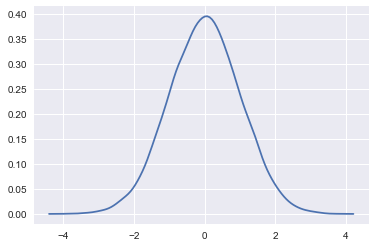

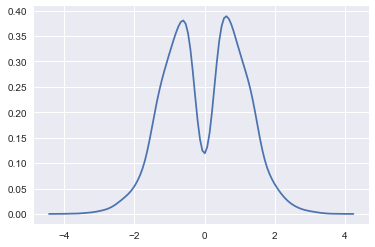

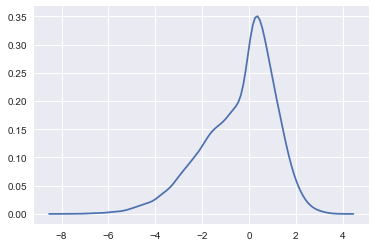

In [13]:
import math
x = np.random.randn(10000)
# for i in range(len(x)):
#     x[i] = math.ceil(x[i])
x = pd.Series(x).sort_values()
#print('x = \n'+str(x))
plt.figure()
sns.kdeplot(x)
print('x.kurtosis() = ',x.kurtosis())
print('x.skew() = ',x.skew())

y = x.copy()
y[abs(y)<0.3] *= 5
plt.figure()
sns.kdeplot(y)
print('y.kurtosis() = ',y.kurtosis())
print('y.skew() = ',y.skew())

z = x.copy()
z[z<0] *= 2
plt.figure()
sns.kdeplot(z)
print('z.kurtosis() = ',z.kurtosis())
print('z.skew() = ',z.skew())

### 輸出資料
* to_csv
* to_dict
* to_excel
* to_frame
* to_string
* tolist

In [14]:
x = pd.Series({'b':1,'a':0,'c':2,'d':-1},name="Happy")
x.index.name = 'xindex'
print('[x]\n'+str(x)+"\n")
print('[x.to_csv()] : '+str(x.to_csv("output_to_csv.csv")))
print('[x.to_csv()] : '+str(x.to_csv("output_to_csv2.csv",header=True)))
print('[x.to_excel()] : '+str(x.to_excel("output_to_csv.xlsx",header=False)))
print('[x.to_excel()] : '+str(x.to_excel("output_to_csv2.xlsx",header=True)))
print('[x.to_dict()] : '+str(x.to_dict())+"\n")
print('[x.to_frame()]\n'+str(x.to_frame())+"\n")
print('[x.to_string()]\n'+x.to_string())
print('type(x.to_string()) is'+str(type(x.to_string()))+"\n")
print('[x.tolist()] : '+str(x.tolist()))
print('type(x.tolist()) is'+str(type(x.tolist()))+"\n")

[x]
xindex
a    0
b    1
c    2
d   -1
Name: Happy, dtype: int64

[x.to_csv()] : None
[x.to_csv()] : None
[x.to_excel()] : None
[x.to_excel()] : None
[x.to_dict()] : {'a': 0, 'b': 1, 'c': 2, 'd': -1}

[x.to_frame()]
        Happy
xindex       
a           0
b           1
c           2
d          -1

[x.to_string()]
xindex
a    0
b    1
c    2
d   -1
type(x.to_string()) is<class 'str'>

[x.tolist()] : [0, 1, 2, -1]
type(x.tolist()) is<class 'list'>



### 繪圖
* plot
* hist

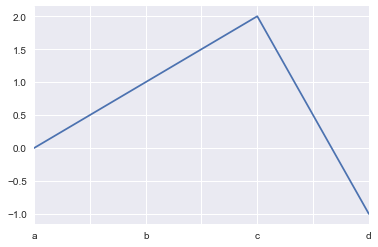

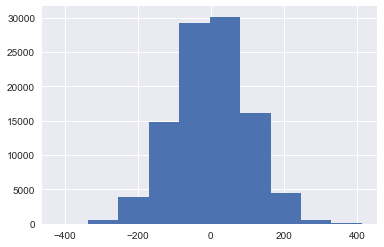

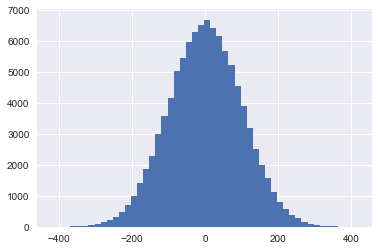

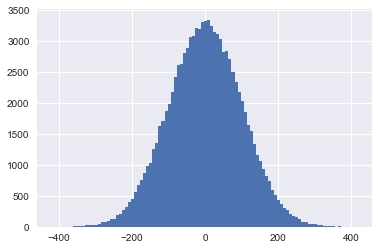

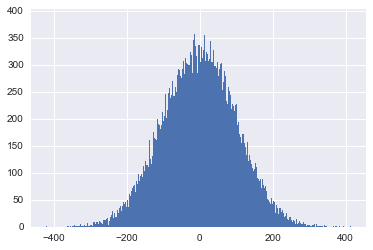

In [15]:
x = pd.Series({'b':1,'a':0,'c':2,'d':-1},name="Happy")
plt.figure()
x.plot()

x = pd.Series(np.random.randn(100000)*100,name="Happy")
plt.figure()
x.hist(bins=10)
plt.figure()
x.hist(bins=50)
plt.figure()
x.hist(bins=100)
plt.figure()
x.hist(bins=1000)


#print('\nx.hist                      =\n', x.hist                    )   
#print('\nx.plot                      =\n', x.plot                    )   


### Series 數值處理
* abs()
* copy()
* corr(other) : 計算correlation, other為另一Series, igonre missing values
* cov(other) : 計算covariance, other為另一Series, igonre missing values
* cumsum(): 計算cumulative sum
* describe(): 描述統計特性
* count(): 計算value數量
* mean(): 計算mean值
* std(): 計算standard variation值
* var(): variance值
* min(): 計算min值
* max(): 計算max值
* max(): 計算sum值
* dot(other): 計算內積
* product/prod: 計算vector值的乘積
* drop('key'): drop掉某個key及值
* dropna(): drop掉nan
* get_value('key'): return 該欄位的值
* get_values(): return np.ndarray
* isin([list of values]): return boolean Series
* isnull(): return boolean Series if null
* sort_values(): 依照值排列
* sort_index(): 依照index排列
* rank(): 在軸上看有幾個相異值
* ravel(): 將data的部份以ndarry回傳
* argsort() : 將value做sorting，並將sorting後的排名 (0開始) 放於data欄位上
* sample(n) : 從Series任選n個sample出來, return a Series object
* unique() : data中不重複的值，return ndarray
* transpose() : transpose, by definition itself

In [16]:
x = pd.Series({'b':1,'a':0,'c':2,'d':-1},name="Happy")
y = pd.Series({'b':3,'a':1,'c':-2,'d':9},name="Happy2")
print('[x.abs()]\n'+str(x.abs())+"\n")
y=x.copy()
print('[y=x.copy()]\n'+str(y)+"\n")

y=x.copy()+np.random.randint(2,size=x.shape)
y.name="Happy2"

print('[x.corr(y)] : '+str(x.corr(y))+"\n")
print('[x.cov()] : '+str(x.cov(y))+"\n")

print('[concat x and y]\n'+str(pd.concat([x,y],axis=1))+"\n")
print('type(concat x and y)\n'+str(type(pd.concat([x,y],axis=1)))+"\n")

print('[x.cumsum()]\n'+str(x.cumsum())+"\n")

print('[x.describe()]\n'+str(x.describe())+'\n') 
print('[x.count()] : '+str(x.count())+'\n') 
print('[x.median()] : '+str(x.median())+'\n') 
print('[x.mean()] : '+str(x.mean())+'\n') 
print('[x.std()] : '+str(x.std())+'\n') 
print('[x.var()] : '+str(x.var())+'\n')
print('[x.min()] : '+str(x.min())+'\n') 
print('[x.max()] : '+str(x.max())+'\n') 
print('[x.sum()] : '+str(x.sum())+'\n') 
print('[x.dot(y)] : '+str(x.dot(y))+' where \n'+str(pd.concat([x,y],axis=1))+"\n")
print('[[1,2,3,4].product()] : '+str(pd.Series(data=[1,2,3,4]).product())+"\n")
print('[[1,np.nan,3,4].product()] : '+str(pd.Series(data=[1,np.nan,3,4]).product())+"\n")
print('[x.drop(\'a\')]\n'+str(x.drop('a'))+"\n")
print('[[1,np.nan,3,4].dropna()]\n'+str(pd.Series(data=[1,np.nan,3,4]).dropna())+"\n")
print('[x.get_value(\'a\')] : '+str(x.get_value('a'))+' with type '+str(type(x.get_value('a')))+'\n') 
print('[x.get_values()] : '+str(x.get_values())+' with type '+str(type(x.get_values()))+'\n') 
print('[x.isin([-1])]:\n'+str(x.isin([-1]))+"\n")  
print('[x.isin([1,-1])]\n'+str(x.isin([1,-1]))+"\n")
print('[type(x.isin([1,-1]))]\n'+str(type(x.isin([1,-1])))+"\n")
print('[x.isnull()]\n'+str(x.isnull())+"\n")
print('type(x.isnull()) is '+str(type(x.isnull()))+"\n")

print('[x.sort_values()]\n'+str(x.sort_values())+"\n")
print('type(x.sort_values()) is '+str(type(x.sort_values()))+"\n")

print('[x.sort_index()]\n'+str(x.sort_index())+"\n")
print('type(x.sort_index()) is '+str(type(x.sort_index()))+"\n")

print('[x.rank()]\n'+str(x.rank()))
print('type(x.rank()) is '+str(type(x.rank()))+"\n")

print('[[1,2,3,4].rank()]\n'+str(pd.Series([1,2,3,4]).rank())+"\n")
print('[[1,1,1,1].rank()]\n'+str(pd.Series([1,1,1,1]).rank())+"\n")
print('[[1,1,4,4].rank()]\n'+str(pd.Series([1,1,4,4]).rank())+"\n")
print('[x.ravle()]\n'+str(x.ravel()))
print('type(x.ravle()) is '+str(type(x.ravel()))+'\n')

print('[x,x.argsort()]\n'+str(pd.concat([x,x.argsort()],axis=1))+'\n')

print('[x.sample(n=3)]\n'+str(x.sample(n=3)))
print('type(x.sample(n=3)) is '+str(type(x.sample(n=3)))+'\n')

print('[[0,1,2,3].unique()]\n'+str(pd.Series([0,1,2,3]).unique()))
print('type([0,1,2,3].unique()) is '+str(type(pd.Series([0,1,2,3]).unique()))+'\n')

print('[[1,1,2,3].unique()]\n'+str(pd.Series([1,1,2,3]).unique())+"\n")

print('[[\'a\',\'b\',\'c\',\'d\'].transpose()]\n'+str(pd.Series(['a','b','c','d']).transpose()))
print('type([\'a\',\'b\',\'c\',\'d\'].transpose()) is '+str(type(pd.Series(['a','b','c','d']).transpose()))+'\n')


[x.abs()]
a    0
b    1
c    2
d    1
Name: Happy, dtype: int64

[y=x.copy()]
a    0
b    1
c    2
d   -1
Name: Happy, dtype: int64

[x.corr(y)] : 0.948683298051

[x.cov()] : 1.0

[concat x and y]
   Happy  Happy2
a      0       1
b      1       1
c      2       2
d     -1       0

type(concat x and y)
<class 'pandas.core.frame.DataFrame'>

[x.cumsum()]
a    0
b    1
c    3
d    2
Name: Happy, dtype: int64

[x.describe()]
count    4.000000
mean     0.500000
std      1.290994
min     -1.000000
25%     -0.250000
50%      0.500000
75%      1.250000
max      2.000000
Name: Happy, dtype: float64

[x.count()] : 4

[x.median()] : 0.5

[x.mean()] : 0.5

[x.std()] : 1.2909944487358056

[x.var()] : 1.6666666666666667

[x.min()] : -1

[x.max()] : 2

[x.sum()] : 2

[x.dot(y)] : 5 where 
   Happy  Happy2
a      0       1
b      1       1
c      2       2
d     -1       0

[[1,2,3,4].product()] : 24

[[1,np.nan,3,4].product()] : 12.0

[x.drop('a')]
b    1
c    2
d   -1
Name: Happy, dtype: int64

[[1

### Series Key (index)處理
* app_prefix(str) : add str為key的前綴
* add_suffix(str) : add str為key的後綴
* argmax() : 最大值的key
* argmin() : 最小值的key
* head(int) : 顯示頭N行
* tail(int) : 顯示末N行
* reset_index() : 將原本的index欄位變成data欄位，並新增index欄。return DataFrame

In [17]:
x = pd.Series({'b':1,'a':0,'c':2,'d':-1},name="Happy")
print('[x.add_prefix()]\n'+str(x.add_prefix('pre_'))+'\n')         
print('[x.add_suffix()]\n'+str(x.add_suffix('_post'))+'\n')            
print('[x.argmax()]\n'+str(x.argmax())+'\n')     
print('[x.argmin()]\n'+str(x.argmin())+'\n')
print('[x.idxmax()]\n'+str(x.idxmax())+'\n')
print('[x.idxmin()]\n'+str(x.idxmin())+'\n')
print('[x.head(3)]\n'+str(x.head(3))+'\n')
print('[x.tail(3)]\n'+str(x.tail(3))+'\n')
print('[x.reset_index()]\n'+str(x.reset_index()))
print('type(x.reset_index()) is '+str(type(x.reset_index()))+'\n')

[x.add_prefix()]
pre_a    0
pre_b    1
pre_c    2
pre_d   -1
Name: Happy, dtype: int64

[x.add_suffix()]
a_post    0
b_post    1
c_post    2
d_post   -1
Name: Happy, dtype: int64

[x.argmax()]
c

[x.argmin()]
d

[x.idxmax()]
c

[x.idxmin()]
d

[x.head(3)]
a    0
b    1
c    2
Name: Happy, dtype: int64

[x.tail(3)]
b    1
c    2
d   -1
Name: Happy, dtype: int64

[x.reset_index()]
  index  Happy
0     a      0
1     b      1
2     c      2
3     d     -1
type(x.reset_index()) is <class 'pandas.core.frame.DataFrame'>



### Series Attributes
* axes (List)
* index (Index object): use list() to transform it to become a list
* keys() (Index object): use list() to transform it to become a list
* values (np.ndarray): 可以用np的reshape
* name (str)
* dtype/dtypes (np.dtype)
* empty (boolean)
* ftype/ftypes (string) : 'dense':'sparse'
* ndim (int) : dimension, by definition 1
* is_monotonic (boolean) : monotonicity
* is_unique (boolean) : return boolean if values in the object are unique
* shape (tuple) : return tuple
* strides (tuple) : return a tuple, the strides of the data ?????



In [18]:
print('\n[x.axes]\n'+str(x.axes))
print('type(x.axes) is '+str(type(x.axes))+"\n")

print('\n[x.index]\n'+str(x.index))
print('type(x.index) is '+str(type(x.index))+"\n")

print('\n[list(x.index)]\n'+str(list(x.index)))
print('type(list(x.index) is '+str(type(list(x.index)))+"\n")

print('\n[x.keys()]\n'+str(x.keys()))
print('type(x.keys) is '+str(type(x.keys()))+"\n")

print('\n[list(x.keys())]\n'+str(list(x.keys())))
print('type(list(x.keys())) is '+str(type(list(x.keys())))+"\n")

print('\n[x.values]\n'+str(x.values))
print('type(x.values) is '+str(type(x.values))+"\n")
print('\n[x.values.reshape(int(x.values.size/2),2)]\n'+str(x.values.reshape(int(x.values.size/2),2)))

#print('\n[x.values.reshape(int(x.values.size)/2,2)]\n'+str(x.values.reshape(int(x.values.size)/2,2)))

print('\n[x.name]\n'+str(x.name))
print('type(x.name) is '+str(type(x.name))+"\n")

print('\n[x.dtype]\n'+str(x.dtype))
print('type(x.dtype) is '+str(type(x.dtype))+"\n")

print('\n[x.dtypes]\n'+str(x.dtypes))
print('type(x.dtypes) is '+str(type(x.dtypes))+"\n")

print('\n[x.empty]\n'+str(x.empty))
print('type(x.empty) is '+str(type(x.empty))+"\n")

print('\n[x.ftype]\n'+str(x.ftype))
print('type(x.ftype) is '+str(type(x.ftype))+"\n")

print('\n[x.ftypes]\n'+str(x.ftypes))
print('type(x.ftypes) is '+str(type(x.ftypes))+"\n")

print('\n[x.ndim]\n'+str(x.ndim))
print('type(x.ndim) is '+str(type(x.ndim))+"\n")

print('\n[x.is_monotonic]\n'+str(x.is_monotonic))
print('type(x.is_monotonic) is '+str(type(x.is_monotonic))+"\n")

print('\n[[1,2,3,4].is_unique]\n'+str(pd.Series(data=[1,2,3,4]).is_unique))
print('type([1,2,3,4].is_unique) is '+str(type(pd.Series(data=[1,2,3,4]).is_unique))+"\n")

print('\n[[1,2,4,4].is_unique]\n'+str(pd.Series(data=[1,2,4,4]).is_unique))
print('type([1,2,4,4].is_unique) is '+str(type(pd.Series(data=[1,2,4,4]).is_unique))+"\n")

print('\n[x.shape]\n'+str(x.shape))
print('type(x.shape) is '+str(type(x.shape))+"\n")

print('\n[x.strides]\n'+str(x.strides))
print('type(x.strides) is '+str(type(x.strides))+"\n")


[x.axes]
[Index(['a', 'b', 'c', 'd'], dtype='object')]
type(x.axes) is <class 'list'>


[x.index]
Index(['a', 'b', 'c', 'd'], dtype='object')
type(x.index) is <class 'pandas.core.indexes.base.Index'>


[list(x.index)]
['a', 'b', 'c', 'd']
type(list(x.index) is <class 'list'>


[x.keys()]
Index(['a', 'b', 'c', 'd'], dtype='object')
type(x.keys) is <class 'pandas.core.indexes.base.Index'>


[list(x.keys())]
['a', 'b', 'c', 'd']
type(list(x.keys())) is <class 'list'>


[x.values]
[ 0  1  2 -1]
type(x.values) is <class 'numpy.ndarray'>


[x.values.reshape(int(x.values.size/2),2)]
[[ 0  1]
 [ 2 -1]]

[x.name]
Happy
type(x.name) is <class 'str'>


[x.dtype]
int64
type(x.dtype) is <class 'numpy.dtype'>


[x.dtypes]
int64
type(x.dtypes) is <class 'numpy.dtype'>


[x.empty]
False
type(x.empty) is <class 'bool'>


[x.ftype]
int64:dense
type(x.ftype) is <class 'str'>


[x.ftypes]
int64:dense
type(x.ftypes) is <class 'str'>


[x.ndim]
1
type(x.ndim) is <class 'int'>


[x.is_monotonic]
False
type(

In [19]:
s1 = pd.Series([1,3,6,np.nan,44,1])
s1

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64

In [20]:
s1 = pd.Series([1,3,6,np.nan,44,1],index=['a','b','c','d','e','f'])
s1

a     1.0
b     3.0
c     6.0
d     NaN
e    44.0
f     1.0
dtype: float64

## DataFrame
### 用手寫set來做DataFrame

In [21]:
df = pd.DataFrame({'col1':[1,2,3,4,5],'col2':['a','b','cc','d','ef']})
df

,col1,col2
0,1,a
1,2,b
2,3,cc
3,4,d
4,5,ef


### 產生DataFrame用np.random.randn產生出一個6*4大小數值為標準常態分佈，並命名欄位名稱依序為a, b, c, d

In [22]:
df = pd.DataFrame(data=np.random.randn(6,4),columns=['a','b','c','d'])
print(df.head())
print("-----------------")
print(df.info())

          a         b         c         d
0 -2.033454  1.015350  0.508785 -2.131730
1 -0.569860 -1.998266  0.448300  1.078432
2  0.256231  0.412274  0.876662  0.107605
3  0.580583  0.643066  0.386151 -1.437560
4 -1.601770  0.514928 -0.771096 -0.439381
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
a    6 non-null float64
b    6 non-null float64
c    6 non-null float64
d    6 non-null float64
dtypes: float64(4)
memory usage: 272.0 bytes
None


### 將iris的資料做成DataFrame

In [23]:
from sklearn import datasets
iris = datasets.load_iris()

In [24]:
iris_pd = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
iris_pd_y = pd.DataFrame(data=iris['target'],columns=['target_names'])
iris_pd_y.head()

,target_names
0,0
1,0
2,0
3,0
4,0


In [26]:
iris_pd = pd.concat([iris_pd,iris_pd_y],axis=1)
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
## print DataFrame information
print(iris_pd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target_names         150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [28]:
## print DataFrame description
print(iris_pd.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  target_names  
count        150.000000    150.000000  
mean           1.198667      1.000000  
std            0.763161      0.819232  
min            0.100000      0.000000  
25%            0.300000      0.000000  
50%            1.300000      1.000000  
75%            1.800000      2.000000  
max            2.500000      2.000000  


### 可利用columns函式取得欄位名稱，以及用sort_values來做資料排序
###### 假設iris_pd為DataFrame, iris_pd['sepal length (cm)'] 為Seris，iris_pd['sepal length (cm)'].sort_values() 會return Series

###### iris_pd.sort_values一定要帶入參數by表示依哪個column做sorting: iris_pd.sort_values(by='sepal length (cm)') 會return DataFrame

In [29]:
iris_pd.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target_names'],
      dtype='object')

In [30]:
print(iris_pd['sepal length (cm)'].sort_values().head())
print ("data type is ",type(iris_pd['sepal length (cm)'].sort_values()))

13    4.3
42    4.4
38    4.4
8     4.4
41    4.5
Name: sepal length (cm), dtype: float64
data type is  <class 'pandas.core.series.Series'>


In [31]:
iris_pd_bysepallg = iris_pd.sort_values(by='sepal length (cm)')
print(iris_pd_bysepallg.head())
print ("data type is ",type(iris_pd_bysepallg))

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
13                4.3               3.0                1.1               0.1   
42                4.4               3.2                1.3               0.2   
38                4.4               3.0                1.3               0.2   
8                 4.4               2.9                1.4               0.2   
41                4.5               2.3                1.3               0.3   

    target_names  
13             0  
42             0  
38             0  
8              0  
41             0  
data type is  <class 'pandas.core.frame.DataFrame'>


### DataFrame 部份選擇欄位
###### data_frame['col_name'] : Series 物件
print時不會有column name
###### data_frame[['col_name']] (兩組中括號): DataFrame 物件
print時有column name

In [32]:
iris_partial = iris_pd['sepal length (cm)']
iris_partial2 = iris_pd[['sepal length (cm)']]
iris_partial3 = iris_pd[['sepal length (cm)','sepal width (cm)']]
print("type of iris_partial is",type(iris_partial))
print("type of iris_partial2 is",type(iris_partial2))
print("type of iris_partial3 is",type(iris_partial3))
print("")
print("iris_partial content is: ")
print(iris_partial.head())
print("")
print("iris_partial2 content is: ")
print(iris_partial2.head())


type of iris_partial is <class 'pandas.core.series.Series'>
type of iris_partial2 is <class 'pandas.core.frame.DataFrame'>
type of iris_partial3 is <class 'pandas.core.frame.DataFrame'>

iris_partial content is: 
0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

iris_partial2 content is: 
   sepal length (cm)
0                5.1
1                4.9
2                4.7
3                4.6
4                5.0


### DataFrame資料選取
###### 方法1: 兩次括號篩選
data[5:10][['col1','col2']]
###### 方法2: obj.loc
data.loc[5:10,['col1','col2']]

In [33]:
iris_pd_sel1 = iris_pd[5:10][['sepal length (cm)','sepal width (cm)','petal length (cm)']]
print("type of iris_pd_sel1 is:",type(iris_pd_sel1))
iris_pd_sel1

type of iris_pd_sel1 is: <class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm)
5,5.4,3.9,1.7
6,4.6,3.4,1.4
7,5.0,3.4,1.5
8,4.4,2.9,1.4
9,4.9,3.1,1.5


In [34]:
iris_pd_sel2 = iris_pd.loc[5:10,['sepal length (cm)','sepal width (cm)','petal length (cm)']]
print("type of iris_pd_sel2 is:",type(iris_pd_sel2))
iris_pd_sel2

type of iris_pd_sel2 is: <class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm)
5,5.4,3.9,1.7
6,4.6,3.4,1.4
7,5.0,3.4,1.5
8,4.4,2.9,1.4
9,4.9,3.1,1.5
10,5.4,3.7,1.5


### DataFrame資料篩選
在中括號裡面放入篩選條件

In [35]:
iris_pd[iris_pd['sepal length (cm)'] > 7]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
102,7.1,3.0,5.9,2.1,2
105,7.6,3.0,6.6,2.1,2
107,7.3,2.9,6.3,1.8,2
109,7.2,3.6,6.1,2.5,2
117,7.7,3.8,6.7,2.2,2
118,7.7,2.6,6.9,2.3,2
122,7.7,2.8,6.7,2.0,2
125,7.2,3.2,6.0,1.8,2
129,7.2,3.0,5.8,1.6,2
130,7.4,2.8,6.1,1.9,2


### DataFrame資料分群


In [36]:
print("Data type of DataFrame.groupby is ",type(iris_pd.groupby(by='target_names').sum()))
iris_pd.groupby(by='target_names').sum()

Data type of DataFrame.groupby is  <class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target_names,,,,
0,250.3,170.9,73.2,12.2
1,296.8,138.5,213.0,66.3
2,329.4,148.7,277.6,101.3


In [37]:
iris_pd.groupby(by='target_names').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target_names,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [38]:
iris_pd.groupby(by='target_names').std()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target_names,,,,
0,0.352490,0.381024,0.173511,0.107210
1,0.516171,0.313798,0.469911,0.197753
2,0.635880,0.322497,0.551895,0.274650
